## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isna().sum() # всё по нулям - следовательно, пропусков нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
X.info()    # везде float64 тип данных - значит категориальных признаков нет
        # в целом, данным методом можно проверить на пропуски (178 non-null элементов везде - значит пропусков нет)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
zoomer = StandardScaler().fit(X_train[['alcohol', 'magnesium']])
X_train_mas = pd.DataFrame(data=zoomer.transform(X_train[['alcohol', 'magnesium']]))
X_test_mas = pd.DataFrame(data=zoomer.transform(X_test[['alcohol', 'magnesium']]))
print('k', 'Train', '\t\tTest', sep='\t')
clfs = np.array([])   #classifiers
for k in [1, 3, 5, 10, 15, 25]:
    cur_clf = KNeighborsClassifier(n_neighbors=k).fit(X_train_mas, y_train)     #евклидово расстояние - по умолчанию
    clfs = np.append(clfs, cur_clf)
    cur_train_accuracy = np.mean(y_train == cur_clf.predict(X_train_mas))
    cur_test_accuracy = np.mean(y_test == cur_clf.predict(X_test_mas))
    print(k, cur_train_accuracy, cur_test_accuracy, sep='\t')

k	Train			Test
1	0.9919354838709677	0.6666666666666666
3	0.8387096774193549	0.6481481481481481
5	0.8064516129032258	0.6851851851851852
10	0.8064516129032258	0.7037037037037037
15	0.782258064516129	0.6851851851851852
25	0.7258064516129032	0.6851851851851852


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
#!pip install mlxtend

In [ ]:
%pip install mlxtend --upgrade

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

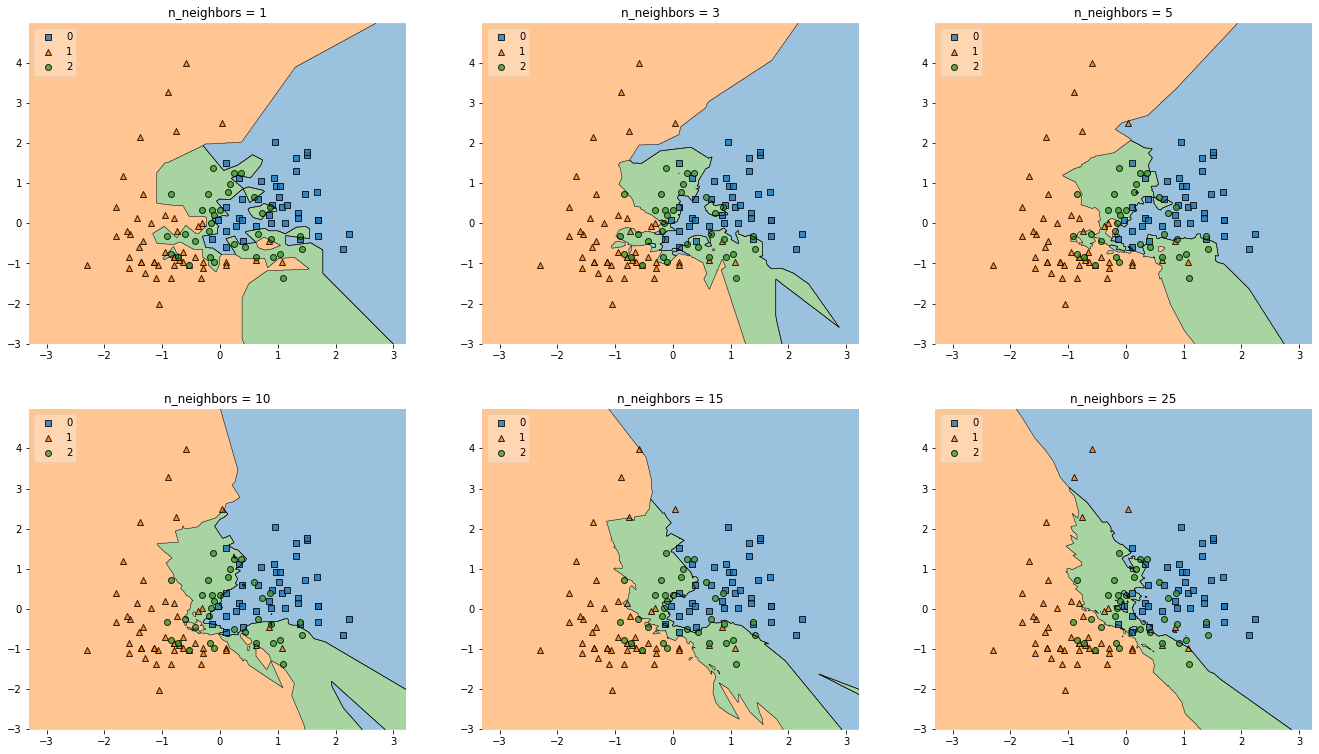

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(23,13))

for clf, grd in zip(clfs, itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_mas.to_numpy(), y=y_train, clf=clf, legend=2)
    plt.title("n_neighbors = " + str(clf.n_neighbors))

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

### *k = 1 ; k = 3*
* модель слиишком сильно подгоняется под данные, что логично, - практически не ошибается на train, и много ошибается на test по сравнению с другими; ну и по поверхности видим - она очень 'островная' и это говорит о плохом

### *k = 5 ; k = 10*
* модель уже получше - ошибка на train стала больше, а на test стала поменьше, но всё равно, она на граничных участках начинает подгоняться: вставляет маленькие 'островки' как будто пытается не развязать войну и уделить всем и сразу на одном месте

### *k = 15*
* модель тоже становится получше, но она какая-то странная - ошибка на train стала больше, и на test стала больше, какая-то непонятная 'иголка' внутри синей части, но уже без 'островочков', можно сказать, что неплохо, но вот чувствуется, что она переобучилась и подгоняется слегка

## **k = 25**
* хорошая модель из всех, по-моему мнению, - ошибка на train подросла, а ошибка на test не изменилась, что служит хорошим сигналом, как я считаю; по поверхности тоже видно, что она не подгоняется, без всяких выбросов, нормальные границы, как было сказано на лекции ""модель здорового человека"" :D
# *Я считаю, что k = 25 оптимальный выбор*


### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

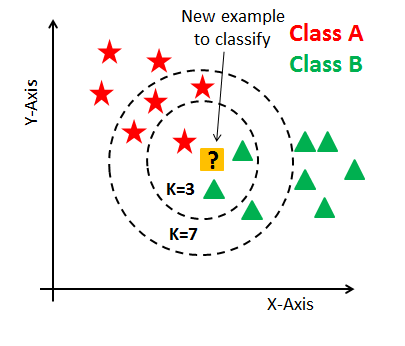

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      # (YOUR)MY CODE HERE
      self.data = X
      self.answer = y
    
    def predict(self, X):
      # (YOUR)MY CODE HERE
      mapOfDistance = map(lambda curX: np.linalg.norm(curX - self.data, axis=1), X)
      kNearestNeighbors = map(lambda curMoD: list(zip(*sorted(zip(curMoD, self.answer))[:self.k]))[1], mapOfDistance)
      return np.fromiter(map(lambda curN: max(Counter(curN)), kNearestNeighbors), np.int64)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [ ]:
data.isna().sum() # всё по нулям - следовательно, пропусков нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data = data.drop("Unnamed: 0", axis=1)  # это просто индекс - он точно не нужен; а всё остальное - важно и нужно
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

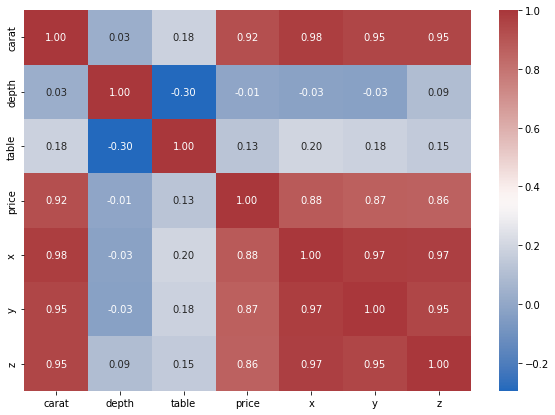

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), cmap="vlag", annot=True, fmt="0.2f")
plt.show()

# больше всего с целевой переменной коррелируют: carat(0.92) , x(0.88) , y(0.87) , z(0.86)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
from sklearn.model_selection import train_test_split

y = data['price']
X = data.drop('price', axis=1)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

zoomer = StandardScaler().fit(X_train)
X_train_mas = pd.DataFrame(data=zoomer.transform(X_train))
X_test_mas = pd.DataFrame(data=zoomer.transform(X_test))

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_clf = LinearRegression().fit(X_train_mas, y_train)
print("MSE for train :", mean_squared_error(y_train, lin_clf.predict(X_train_mas)))
print("MSE for test :", mean_squared_error(y_test, lin_clf.predict(X_test_mas)))

MSE for train : 1290541.9147450614
MSE for test : 1244765.4357158695


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
pd.DataFrame(data=lin_clf.coef_, index=X.columns).sort_values(by=0, ascending=False)
# абсолютно все 'clarity_<..>' , 'x' и особенно 'carat' - по модулю на порядок(а то и порядки) превышают оценки прочих переменных

,0
carat,5338.615671
clarity_VS2,1817.664208
clarity_VS1,1670.318496
clarity_SI1,1611.571681
clarity_VVS2,1461.034194
clarity_VVS1,1284.809475
clarity_SI2,1042.921215
clarity_IF,975.933641
cut_Ideal,414.369515
cut_Premium,339.239204


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

### **My answers:**

* в случае lasso - веса очень хорошо уменьшились 
* а в случае ridge - как-то тухло, прям ну не очень, веса почти не уменьшились
* но в любом случае, чётко понятно, что проблема мультиколлинеарности огромная, проявилась очень сильно. Матрица корреляции тоже это показывает - очень большая корреляция, соответственно, до добра это не доведёт =)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso_clf = Lasso(alpha=10).fit(X_train_mas, y_train)
ridge_clf = Ridge(alpha=10).fit(X_train_mas, y_train)

In [ ]:
pd.DataFrame(data=lasso_clf.coef_, index=X.columns).sort_values(by=0, ascending=False)

,0
carat,4831.596261
clarity_VS2,1099.908858
clarity_VS1,1047.876860
clarity_VVS2,959.298569
clarity_SI1,875.565875
clarity_VVS1,848.817169
clarity_IF,661.829434
clarity_SI2,408.433404
cut_Ideal,206.837676
cut_Premium,151.391271


In [ ]:
pd.DataFrame(data=ridge_clf.coef_, index=X.columns).sort_values(by=0, ascending=False)

,0
carat,5299.360461
clarity_VS2,1787.751717
clarity_VS1,1644.551615
clarity_SI1,1580.720648
clarity_VVS2,1440.490368
clarity_VVS1,1267.179530
clarity_SI2,1016.798688
clarity_IF,963.398523
cut_Ideal,415.480169
cut_Premium,340.215934


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

### **My answers:**

* Агрессивнее уменьшает веса lasso
* Функция потерь в lasso регуляризации штрафует за веса, особенно сильно за большие веса. Её часто используют для отбора признаков, потому что она способна уменьшать веса признаков до нуля, тем самым избавляясь от неинформативных признаков и благодаря этому сложность модели может понизиться.

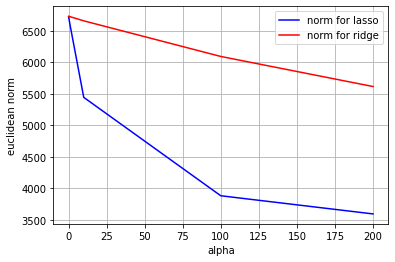

In [ ]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norm = []
ridge_norm = []
for a in alphas:
    lasso_clf = Lasso(alpha=a).fit(X_train_mas, y_train)
    ridge_clf = Ridge(alpha=a).fit(X_train_mas, y_train)
    lasso_norm.append(np.linalg.norm(lasso_clf.coef_))
    ridge_norm.append(np.linalg.norm(ridge_clf.coef_))

plt.plot(alphas, lasso_norm, color='blue')
plt.plot(alphas, ridge_norm, color='red')
plt.legend(['norm for lasso', 'norm for ridge'])
plt.xlabel('alpha')
plt.ylabel('euclidean norm')
plt.grid()
plt.show()

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.linear_model import LassoCV

alphas = np.arange(0.1, 100, 0.1)
lassoCV_clf = LassoCV(alphas=alphas, cv=5).fit(X_train_mas, y_train)
best_alpha = list(zip(*sorted(zip(np.mean(lassoCV_clf.mse_path_, axis=1), lassoCV_clf.alphas_))))[1][0]
best_alpha # где MSE меньше всего - там лучшее наибольшее качество

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68754798.7716217, tolerance: 48476565.465277866
  model = cd_fast.enet_coordinate_descent_gram(


0.4

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

### **My answers:**

* неинформативные: y , z - потому что, в основном, из-за корреляции с 'x'
* информативные: carat , x , clarity - потому что это основные характеристики и показатели бриллиантов (вес, размер, чистота - то на что все смотрят, то что является самой сложной, затратной и важной частью производства)

In [ ]:
lasso_clf = Lasso(alpha=best_alpha).fit(X_train_mas, y_train)
pd.DataFrame(data=lasso_clf.coef_, index=X.columns).sort_values(by=0, ascending=False)

,0
carat,5318.264569
clarity_VS2,1788.510107
clarity_VS1,1645.036961
clarity_SI1,1581.670142
clarity_VVS2,1440.655602
clarity_VVS1,1267.100111
clarity_SI2,1017.143495
clarity_IF,963.171856
cut_Ideal,406.134645
cut_Premium,331.797625


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

### **My answers:**

* лучше использовать lasso-регресию
* потому что она с регуляризатором, и он немного урегулировал обстановку, накинул штрафов, хоть и достаточно незначительно


In [ ]:
mean_squared_error(y_test, lasso_clf.predict(X_test_mas))

1244289.5149807965